In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Read in Data

df = pd.read_csv("F:\SHREY'S\INTERNSHIP SHREY\TASK 2\Data Set\Reviews.csv")
print(df.shape)

df = df.head(500)
print(df.shape)

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\shrey\AppData\Local\Temp\ipykernel_432\2285160878.py:3: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("F:\SHREY'S\INTERNSHIP SHREY\TASK 2\Data Set\Reviews.csv")


(568454, 10)
(500, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


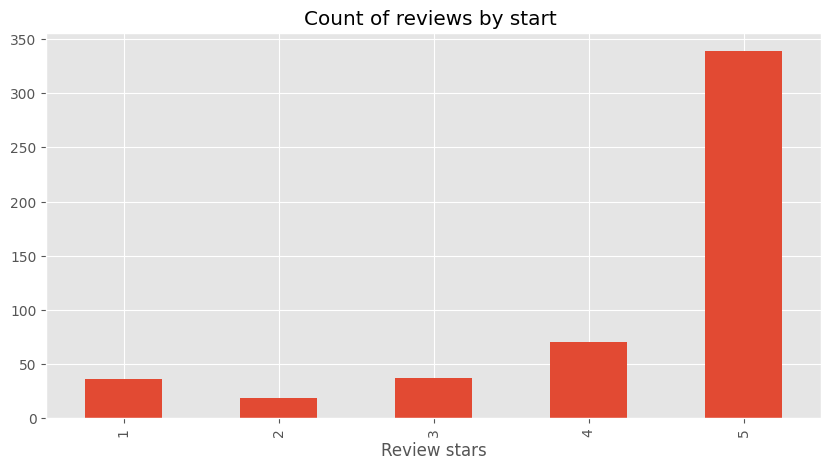

In [4]:
ax = df['Score'].value_counts().sort_index()\
    .plot(kind='bar' , 
        title="Count of reviews by start ",
            figsize=(10,5))
ax.set_xlabel('Review stars')
plt.show()

In [5]:
example = df['Text'][50]
print(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Step 1. VADER Seniment Scoring¶


In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [9]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [10]:
sia.polarity_scores(example)


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [11]:
from tqdm import tqdm

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 636.36it/s]


In [12]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [13]:
vaders.head()


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


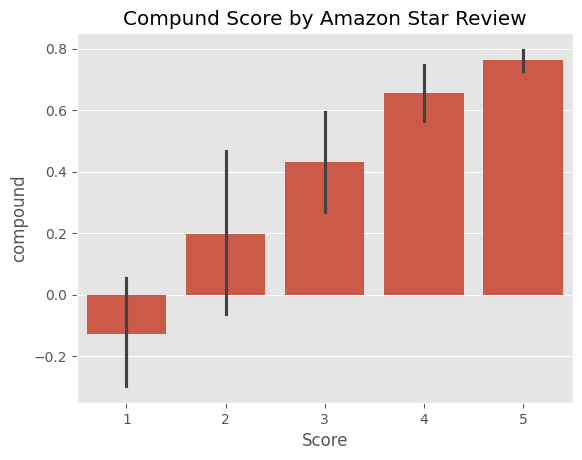

In [14]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

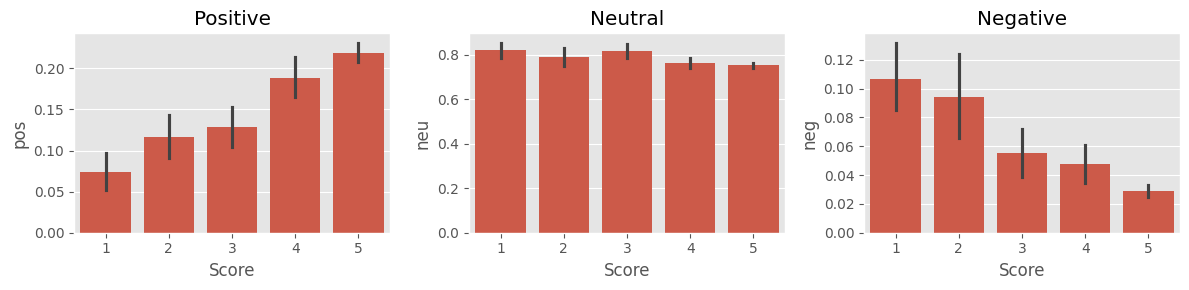

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Sentiment Analysis using RoBERTa


In [16]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import time

# Load dataset
df = pd.read_csv("F:\SHREY'S\INTERNSHIP SHREY\TASK 2\Data Set\Reviews.csv")
df = df.dropna(subset=['Text'])

# Load RoBERTa model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment pipeline
device = 0 if torch.cuda.is_available() else -1
sentiment_pipeline = pipeline(
    task="sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=device
)

# Analyze sentiment (use entire dataset by removing the slice)
texts = df['Text'].tolist()[:100]  # Remove [:100] to process all data

# Process in batches
batch_size = 16
results = []

for i in range(0, len(texts), batch_size):
    batch_texts = texts[i:i+batch_size]
    batch_results = sentiment_pipeline(batch_texts, truncation=True, max_length=512)
    results.extend(batch_results)
    print(f"Progress: {min(i + batch_size, len(texts))}/{len(texts)} reviews processed")

# Add results to dataframe
df_result = df.iloc[:len(results)].copy()
df_result['roberta_label'] = [res['label'] for res in results]
df_result['roberta_score'] = [res['score'] for res in results]

# Map technical labels to readable sentiment
label_mapping = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral', 
    'LABEL_2': 'Positive'
}
df_result['sentiment'] = df_result['roberta_label'].map(label_mapping)

# Save results
df_result.to_csv("roberta_sentiment_output.csv", index=False)
print("Sentiment analysis complete and saved to 'roberta_sentiment_output.csv'")

<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\shrey\AppData\Local\Temp\ipykernel_432\4286115088.py:8: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("F:\SHREY'S\INTERNSHIP SHREY\TASK 2\Data Set\Reviews.csv")
c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shrey\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space

KeyboardInterrupt: 